In [1]:
import numpy as np
import matplotlib.pyplot as plt


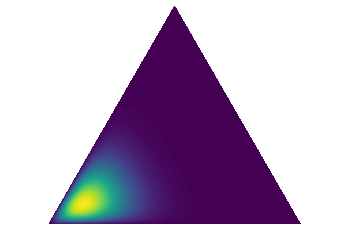

In [163]:
import dirichlet_plots as dp
dp.draw_pdf_contours(dp.Dirichlet([1,1,1]))
plt.savefig('dirichlet111.png')
dp.draw_pdf_contours(dp.Dirichlet([10,10,10]))
plt.savefig('dirichlet101010.png')
dp.draw_pdf_contours(dp.Dirichlet([10,2,2]))
plt.savefig('dirichlet1022.png')

alpha = [1 2 3 4 5]
theta = [0.03401988 0.17096532 0.28558232 0.18528777 0.32414471]


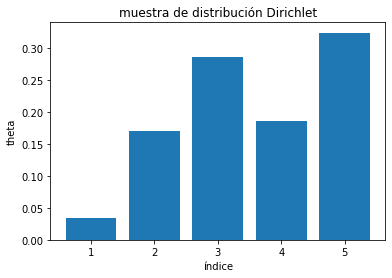

In [175]:
k = 5
alpha = np.array([1,2,3,4,5]) 
theta = np.random.dirichlet(alpha)
plt.bar(np.arange(k)+1, theta);
plt.xlabel('índice')
plt.ylabel('theta')
plt.title('muestra de distribución Dirichlet')
print(f'alpha = {alpha}')
print(f'theta = {theta}')

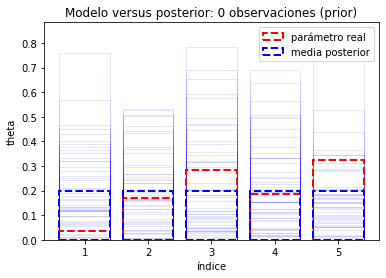

In [237]:
#ahora generar p(x|theta) = multinomial
n = 0
x = np.random.multinomial(n,theta)
new_alpha = np.ones(k) + x
new_theta = np.random.dirichlet(new_alpha, 100)
plt.figure(figsize=(6,4))
for i in range(50):
    plt.bar(np.arange(k)+1, new_theta[i,:], alpha=0.1, edgecolor='b', color='None');
plt.bar(np.arange(k)+1, theta, lw=2, linestyle ='--', edgecolor='r', color='None', label = 'parámetro real');
plt.bar(np.arange(k)+1, new_alpha/np.sum(new_alpha), lw=2, linestyle ='--', edgecolor='blue', color='None', label = 'media posterior');
plt.legend()
plt.title(f'Modelo versus posterior: {n} observaciones (prior)')
plt.xlabel('índice')
plt.ylabel('theta')
plt.savefig(f'post_dirichlet_{n}.pdf')

In [199]:
alpha

array([1, 2, 3, 4, 5])

<BarContainer object of 5 artists>

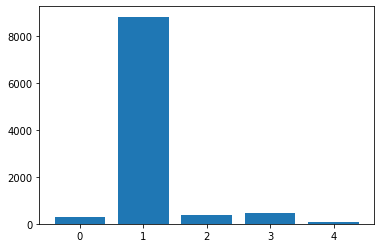

In [143]:
plt.bar(np.arange(k),x)

In [5]:
np.random.dirichlet?